# Widget example

In [1]:
import finesse 
import matplotlib.pyplot as plt
import numpy as np
finesse.configure(plotting=True)
from finesse.analysis.actions import Xaxis
from ccd_viewer import create_unified_viewer, create_widget_controls, display_viewer, apply_dark_mode_css

# Enable interactive plots
%matplotlib widget

In [2]:
L = 3994.485 
rocITM = -1937.9 
rocETM = 2240.0 

cavLIGO = finesse.Model()

cavLIGO.parse(
f"""
# Input optics          
l l1 P=1 #laser with 1W power
s s1 l1.p1 ITM.p1 #space between laser and input test mass

# Input test mass/mirror of the cavity
# T and L are the transmittivity and losses in the mirror
# and R (reflectivity) is computed as R=1-T-L. 
m ITM T=0.0148 L=37.5e-6 Rc={rocITM} #mirror
           
# Space between the two test masses 
s s2 ITM.p2 ETM.p1 L={L} #defined in the geometry

# End test mass 
m ETM T=7.1e-6 L=37.5e-6 Rc={rocETM} #mirror
cav arms source=ETM.p1.o via=ITM.p2.i
""");

In [3]:
## Visualisation of cavity scans for non-Gaussian input beam
## -------------------------------------------------------------------
cav_modes = cavLIGO.deepcopy()
cav_modes.modes(maxtem=4)

# adding HOMs to our input laser beam
cav_modes.l1.tem(0,0,1)
cav_modes.l1.tem(0,1,1)
cav_modes.l1.tem(2,0,1)
cav_modes.l1.tem(3,0,1)
cav_modes.l1.tem(0,4,1)

# adding a camera at tranmission of the cavity
# to visualise the 2D beam shape
cav_modes.parse(
    f"""
    ccd ccd_tra ETM.p2.o xlim=1e-1 ylim=1e-1 npts=100 w0_scaled=false
    """
)

# FSR scans
images = cav_modes.run(Xaxis('ETM.phi', 'lin', 0, 120, 600))
ccd_arr = np.asarray(images["ccd_tra"])
zmin = np.min(ccd_arr)
zmax = np.max(ccd_arr)

Output()

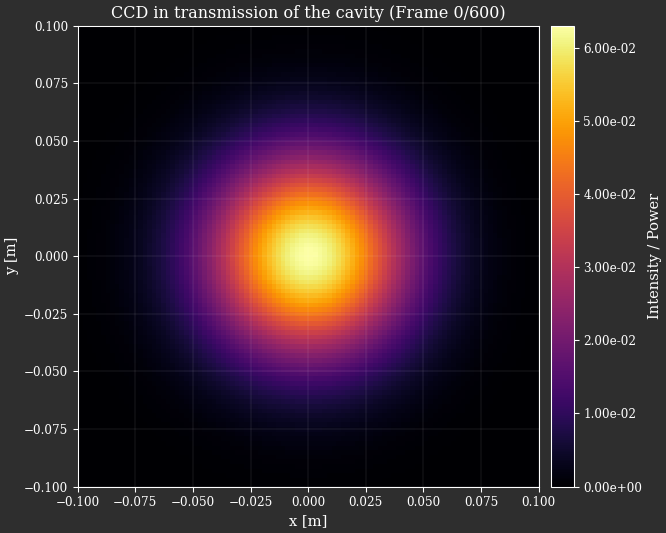

In [4]:
apply_dark_mode_css()  # Apply dark styling to widgets

# Create the viewer with your custom settings
view_func, fig = create_unified_viewer(
    ccd_arr,
    extent=(-1e-1, 1e-1, -1e-1, 1e-1),  # Spatial extent in meters
    zmin=zmin,
    zmax=zmax,
    figsize=(10, 6),  # Customize figure size here
    max_ticks=5,       # Customize tick count here
    dark_mode = True
)

# Create the widget controls
controls = create_widget_controls(ccd_arr)

# Display the interactive viewer
display_viewer(view_func, controls)